<a href="https://colab.research.google.com/github/mayuneko-re/notebook/blob/master/Buckley_Leverett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buckley-Leverett theory

Version 1.13 (2019 Sep. 1)

*Reference:*

*   Buckley S and Leverett M, *Mechanism of Fluid Displacement in Sands*, 1941.
*   Welge H, *A Simplified Method for Computing Oil Recovery by Gas or Water Drive*, 1952.


## Import library

In [0]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

## Fluid model

Each fluid has its own viscosity.

In [0]:
class Fluid:
    def __init__(self, viscosity):
        self.viscosity = viscosity


water = Fluid(viscosity=0.5)
oil = Fluid(viscosity=10)

## Relative permeability model

Water relative permeability $k_{rw}$ is modeled as follows;

$$
k_{rw} = k_{rw,0} \left( \frac{S_w - S_{wc}}{1 - S_{wc} - S_{or}} \right) ^ {n_w} 
$$

where $k_{rw, 0}$ is endpoint relative permeability, $S_{wc}$ is connate water saturation, $S_{or}$ is residual oil saturation and $n_w$ is exponent factor.


Oil relative permeability $k_{ro}$ is modeled as follows;

$$
k_{ro} = k_{ro,0} \left( \frac{S_o - S_{or}}{1 - S_{wc} - S_{or}} \right) ^ {n_o}
$$

where $k_{ro, 0}$ is endpoint relative permeability and $n_o$ is exponent factor.
Here $S_w + S_o = 1$.

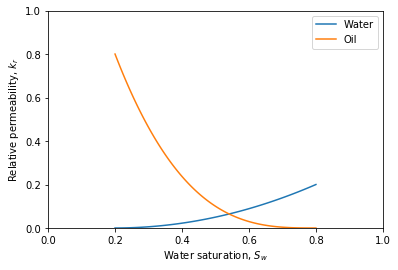

In [0]:
Swc = 0.2 # Connate water saturation
Sor = 0.2 # Residual oil saturation

# Saturation
Sw = np.linspace(start=Swc, stop=1-Sor, num = 100) # Water
So = 1- Sw # Oil

# Normalized saturation
Swn = np.linspace(start=0, stop=1, num = 100) # Water
Son = 1- Swn # Oil

# Relative permeability
def relperm(Sn, kr0, n):
    kr = kr0 * Sn ** n
    return kr

krw = relperm(Sn=Swn, kr0=0.2, n=2) # Water
kro = relperm(Sn=Son, kr0=0.8, n=3) # Oil

# Plotting
plt.plot(Sw, krw, label='Water')
plt.plot(Sw, kro, label='Oil')
plt.legend()
plt.xlabel('Water saturation, $S_w$')
plt.ylabel('Relative permeability, $k_r$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## Fractional flow

Fractional flow of water, $f_w$ is modeled as follows;

$$f_w = \frac{q_w}{q_t} = \frac{1}{1+ \frac{k_{ro}}{ \mu_{o}} / \frac{k_{rw} }{ \mu_{w}}}$$

where $q_w$ is water flow rate, $q_t$ is total flow rate, $\mu_o$ is oil viscosity and $\mu_w$ is water viscosity. Here $f_w + f_o = f_t = 1$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


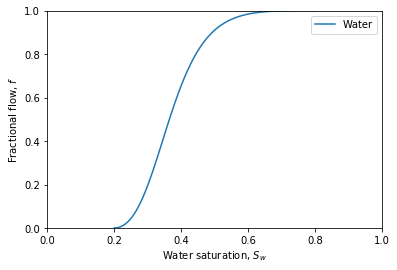

In [0]:
# Fractional flow
fw = 1 / ( 1 + (kro / oil.viscosity) / (krw / water.viscosity) )  # Water
fo = 1 - fw # Oil

# Plot
plt.plot(Sw, fw, label='Water')
plt.legend()
plt.xlabel('Water saturation, $S_w$')
plt.ylabel('Fractional flow, $f$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## Bucklery-Leverett theory

Buckley and Leverett (1941) showed following equation.

$$\frac{df_w}{dS_w} = \frac{dx_D}{dt_D} = v_D $$

where $x_D$ is dimensionless distance, $t_D$ is dimensionless time and $v_D$ is dimensionless velocity of specific saturation.

$$x_D = \frac{x}{L}$$

$$t_D = \frac{vt}{L}$$


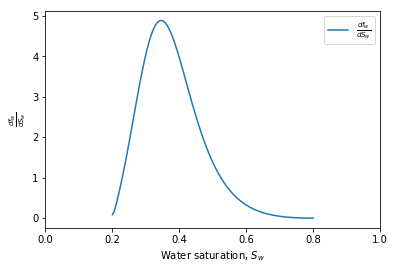

In [0]:
# Derivative of fractional flow of water
dfw = np.gradient(fw, Sw)

# Plot
plt.plot(Sw, dfw, label='$\\frac{df_w}{dS_w}$')
plt.legend()
plt.xlabel('Water saturation, $S_w$')
plt.ylabel('$\\frac{df_w}{dS_w}$')
plt.xlim(0, 1)
plt.show()

## Shock Front

Based on Welge (1952).



*   **Velocity consraint:** Wave velocities in the two phase region must decrease monotonically for zones in which compositions vary continuously as the solution composition path is traced from down stream compositions to upstream compositions.
*   **Entropy condition:** Wave velocities on the upstream side of the shock must be greater than (or equal to) the shock velocity and wave velocities on the down stream side must be less than (or equal to) the shock velocity.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.



Dimensionless Shock Front velocity: 3.299
Shock Front water saturation: 0.424


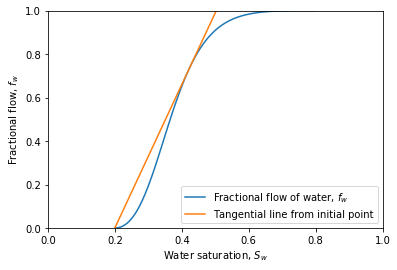

In [0]:
slope_fw = (fw - 0) / (Sw - Swc)  # Warning: slope_fw[0] = nan

vD_sf = np.nanmax(slope_fw) # Shock Front velocity
Sw_sf = Sw[np.nanargmax(slope_fw)] # Shock Front water saturation

print()
print('Dimensionless Shock Front velocity: {0:.3f}'.format(vD_sf))
print('Shock Front water saturation: {0:.3f}'.format(Sw_sf))

# Plot
plt.plot(Sw, fw, label='Fractional flow of water, $f_w$')
plt.plot(Sw, vD_sf*(Sw - Swc) , label='Tangential line from initial point')
plt.legend()
plt.xlabel('Water saturation, $S_w$')
plt.ylabel('Fractional flow, $f_w$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

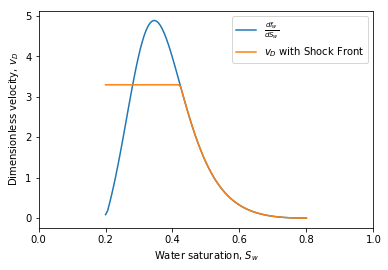

In [0]:
# Dimensionless velocity with Shock Front
vD = np.array([vD_sf if s < Sw_sf else df for s, df in zip(Sw, dfw)])

# Plot
plt.plot(Sw, dfw, label='$\\frac{df_w}{dS_w}$')
plt.plot(Sw, vD, label='$v_D$ with Shock Front')
plt.xlabel('Water saturation, $S_w$')
plt.ylabel('Dimensionless velocity, $v_D$')
plt.xlim(0, 1)
plt.legend()
plt.show()

## Saturation profiles

$$x_D (S_w) = v_D (S_w) \times t_D$$

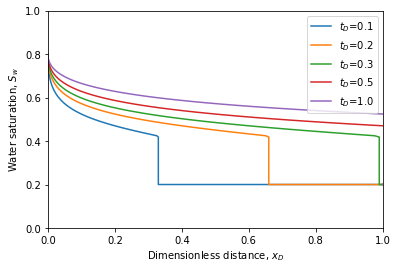

In [0]:
for tD in [0.1, 0.2, 0.3, 0.5, 1.0]:
    xD = vD * tD
    plt.plot([1, *xD], [Swc, *Sw], label='$t_D$='+str(tD))

plt.xlabel('Dimensionless distance, $x_D$')
plt.ylabel('Water saturation, $S_w$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

## Profiles

In [0]:
# Dimensionless time for plotting
tD = np.linspace(start=0, stop=2, num = 100)

### Breakthrough time

Dimensionless time at breackthrough, $t_{D, BT} $ [PV]

$$ t_{D, BT} = \frac{1}{v_{D, sf}}$$

In [0]:
tD_BT = 1/vD_sf
print('Dimensionless time at Breackthrough: {0:.3f}'.format(tD_BT))

Dimensionless time at Breackthrough: 0.303


### Average water saturation

Average water saturation at whole region, $\bar{S_w}$

$$
\bar{S_w} =
        \begin{cases}
            S_{wc} + t_D \quad \quad  \quad t_D \le t_{D, BT}  \\
            S_{w, out} - \frac{f_{w, out} - 1}{f'_{w, out} }  \quad otherwise \\
        \end{cases}
$$

where $S_{w, out}$ is water saturation at outlet, $f_{w, out}$ is fractional flow of water at outlet and $f'_{w, out}$ is derivative of fractional flow of water at outlet.

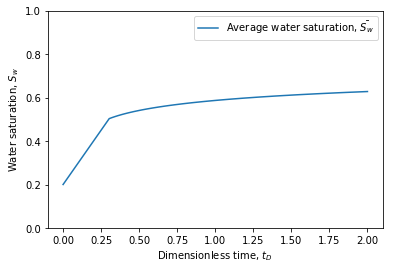

In [0]:
# Water saturation at outlet
f = interpolate.interp1d(vD, Sw, kind='linear')
Sw_out =  np.array([Swc if tDi < tD_BT else  f(1/tDi) for tDi in tD])

# Fractional flow of water at outlet
f = interpolate.interp1d(vD, fw, kind='linear')
fw_out =  np.array([0 if tDi < tD_BT else  f(1/tDi) for tDi in tD])

# Average water saturation at whole region
Sw_ave = np.array([Swc + tD[i] if tD[i] < tD_BT else Sw_out[i] - (fw_out[i] - 1) / (1/tD[i]) for i in range(len(tD))])

# Plot
plt.plot(tD, Sw_ave, label='Average water saturation, $\\bar{S_w}$')
plt.xlabel('Dimensionless time, $t_D$')
plt.ylabel('Water saturation, $S_w$')
# plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

### Oil recovery volume

Oil recovery volume, $N$ [PV]

$$
N =
        \begin{cases}
            t_{D} \quad \quad t_D \le t_{D, BT}  \\
            \bar{S_w} - S_{wc}  \quad otherwise \\
        \end{cases}
$$

Oil recovery volume at breakthrough, $N_{BT}$ [PV]
$$N_{BT} =  t_{D, BT} $$

Oil recovery volume at Breackthrough: 0.303 PV


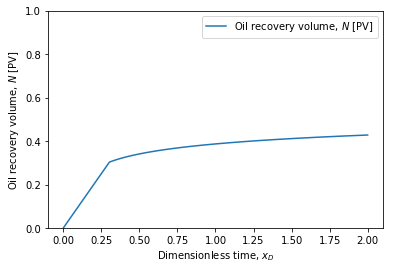

In [0]:
N = np.array([tD[i] if tD[i] < tD_BT else Sw_ave[i] - Swc for i in range(len(tD))])

N_BT = tD_BT
print('Oil recovery volume at Breackthrough: {0:.3f} PV'.format(N_BT))

# Plot
plt.plot(tD, N, label='Oil recovery volume, $N$ [PV]')
plt.xlabel('Dimensionless time, $x_D$')
plt.ylabel('Oil recovery volume, $N$ [PV]')
# plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

### Oil recovery factor

Oil recovery factor, $RF$ [HCPV]

$${RF} = \frac{N}{1-S_{wc}}$$

Oil recovery factor at breackthough, ${RF}_{BT}$ [HCPV]
$${RF}_{BT} = \frac{N_{BT}}{1-S_{wc}}$$

Oil recovery factor at Breackthrough: 0.379 HCPV


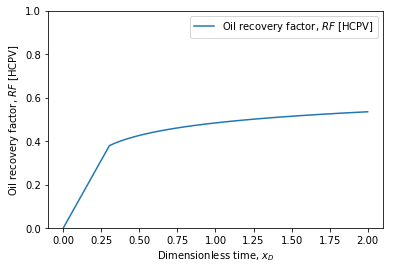

In [0]:
RF = N / (1 - Swc)

RF_BT = N_BT / (1 - Swc) 
print('Oil recovery factor at Breackthrough: {0:.3f} HCPV'.format(RF_BT))

# Plot
plt.plot(tD, RF, label='Oil recovery factor, $RF$ [HCPV]')
plt.xlabel('Dimensionless time, $x_D$')
plt.ylabel('Oil recovery factor, $RF$ [HCPV]')
# plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

End